In [66]:
from gettext import translation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("pandas version:", pd.__version__)            # version used: 2.2.3
print("seaborn version:", sns.__version__)            # version used: 0.13.2
print("matplotlib version:", plt.matplotlib.__version__)   

pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.9.2


In [96]:
stagri_file = 'Stagri structured data.xlsx'

## Loading blood and slaughter data

In [68]:
def load_group_data(file, name_blood, name_slh):
    df_blood = pd.read_excel(file, sheet_name=name_blood)
    df_slh = pd.read_excel(file, sheet_name=name_slh)
    df_blood['cow_id'] = df_blood['Land'] + ' ' + df_blood['Levensnr'].astype(str)
    return df_blood, df_slh

## Identifying matching calf IDs

In [69]:
def get_same_cows_ids(df_blood, df_slh):
    cow_ids_blood = set(df_blood['cow_id'])
    cow_ids_slh = set(df_slh['ID nummer'])
    return  cow_ids_blood.intersection(cow_ids_slh)

## Combining data for matching calves

In [70]:
def combine_matching_cows(df_blood, df_slh, same_cows_ids):
    df_blood_filtered = df_blood[df_blood['cow_id'].isin(same_cows_ids)]
    df_slh_filtered = df_slh[df_slh['ID nummer'].isin(same_cows_ids)]
    
    df_combined = pd.merge(df_blood_filtered, df_slh_filtered, left_on='cow_id', right_on='ID nummer', how='inner')
    
    return df_combined

## Loading stallijst data

In [71]:
def load_stallijst_data(file, name_stallijst):
    df_stallijst = pd.read_excel(file, sheet_name=name_stallijst)
    
    return df_stallijst

## Combining stallijst data with combined dataset

In [72]:
def combine_stallijst(df_combined, df_stallijst):
    df_final_combined = pd.merge(df_combined, df_stallijst, left_on='Levensnr', right_on='Calf ID', how='inner')
    
    return df_final_combined

## Loading arrival weights

In [73]:
def load_arrival_weights(file, name_arrival_weights):
    df_arrival_weights = pd.read_excel(file, sheet_name=name_arrival_weights)
    
    return df_arrival_weights

## Add arrival and weight data

In [74]:
def add_arrival_weight(df_existing, df_arrival_weights):
    df_merged = pd.merge(df_existing, df_arrival_weights[['Stable', 'Handelaar', 'Arrival date', 'Arrival weight']],
                         left_on=['Merchant', 'Arrival Date at Veal Farm'],
                         right_on=['Handelaar', 'Arrival date'],
                         how='left')
    
    return df_merged

## Loading individual treatments

In [75]:
def load_individual_treatments(file, name_individual_treatments):
    df_individual_treatments = pd.read_excel(file, sheet_name=name_individual_treatments)
    
    return df_individual_treatments

## Add sick status


In [121]:
def add_sick_status(df_existing, df_individual_treatments):
    sick_calves = set(df_individual_treatments['Levensnummer'])
    
    df_existing['Sick'] = df_existing['Calf ID + Country'].apply(lambda x: 'yes' if x in sick_calves else 'no')
    
    return df_existing


# Stagri farm

## Group 2128334

### Slaughterhouse (S)

In [104]:
df_blood_2128334, df_slh_2128334 = load_group_data(
    stagri_file, name_blood='Group 2128334 - blood samples',
    name_slh='Group 2128334 Slaughterhouse',
)

In [98]:
same_cows_2128334 = get_same_cows_ids(df_blood_2128334, df_slh_2128334)

def load_blood_sample_sheet(file, name_blood):
    df_blood_samples = pd.read_excel(file, sheet_name=name_blood)
    return df_blood_samples


def load_slaughterhouse_sheet(file, slh_blood):
    df_blood_samples = pd.read_excel(file, sheet_name=slh_blood)
    return df_blood_samples

df_blood_2128334 = load_blood_sample_sheet("Stagri structured data.xlsx", name_blood='Group 2128334 - blood samples')

df_slh_2128334 = load_slaughterhouse_sheet("Stagri structured data.xlsx", slh_blood='Group 2128334 Slaughterhouse')

print("Amount of the blood sample data")
len(df_blood_2128334)
print("------------")

print("Amount of the slaughterhouse data")
len(df_slh_2128334)
print("-----------")

print("The amount of identical calves in both datasets")
len(same_cows_2128334)

Amount of the blood sample data
------------
Amount of the slaughterhouse data
-----------
The amount of identical calves in both datasets


354

In [105]:
df_combined_2128334 = combine_matching_cows(df_blood_2128334,df_slh_2128334, same_cows_2128334)

df_combined_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Nieren,Lever,Kalf,Unnamed: 21,Overziener,Antibiotica,Bacteriologie,Prostaat,Spuitnek,Spuitborst
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df_stallijst_2128334 = load_stallijst_data(stagri_file, name_stallijst='Group 2128334 - Stallijst')

df_stallijst_2128334.head()

df_final_combined_2128334 = combine_stallijst(df_combined_2128334, df_stallijst_2128334)

df_final_combined_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Calf ID,Calf ID + Country,Country ID,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,1.406468e+09,DE1406468164,DE,2021-06-08,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784656,DE,2021-06-26,lochimex,S,Z,Zwartbont,2021-07-14,51.0
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784653,DE,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,51.0
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784654,DE,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,49.0
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,1.406365e+09,DE1406364716,DE,2021-06-29,lochimex,V,Z,Zwartbont,2021-07-14,47.0


In [111]:
df_arrival_weights = load_arrival_weights(stagri_file, name_arrival_weights='Arrival weights'
)

df_final_with_weights = add_arrival_weight(df_final_combined_2128334, df_arrival_weights)

df_final_with_weights.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0


In [160]:
df_individual_treatments = load_individual_treatments(stagri_file, name_individual_treatments='Individual treatments')

df_final_with_sickness_2128334 = add_sick_status(df_final_with_weights, df_individual_treatments)

df_final_with_sickness_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight,Sick
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0,no
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0,no
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0,no


In [161]:
df_cleaned_2128334 = df_final_with_sickness_2128334.dropna(axis=1, how='all')

df_cleaned_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,S2,S3,cow_id,ID nummer,WerkNr,...,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight,Sick
0,DE,1406468164,6.5,7.1,NaN,0.0,NaN,DE 1406468164,DE 1406468164,68164,...,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0,no
1,DE,1269784656,6.7,6.6,NaN,0.0,NaN,DE 1269784656,DE 1269784656,84656,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
2,DE,1269784653,6.3,6.8,NaN,0.0,NaN,DE 1269784653,DE 1269784653,84653,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
3,DE,1269784654,6.6,7,NaN,0.0,NaN,DE 1269784654,DE 1269784654,84654,...,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0,no
4,DE,1406364716,7.0,6.9,NaN,0.0,NaN,DE 1406364716,DE 1406364716,64716,...,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0,no


In [162]:
matching_columns = []

columns = df_cleaned_2128334.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        if df_cleaned_2128334[col1].equals(df_cleaned_2128334[col2]):
            matching_columns.append((col1, col2))

print(f"Total matching columns: {len(matching_columns)}")
for col1, col2 in matching_columns:
    print(f"{col1} matches {col2}")

Total matching columns: 4
Land matches Country ID
cow_id matches ID nummer
Merchant matches Handelaar
Arrival Date at Veal Farm matches Arrival date


In [163]:
columns_to_drop = ['Arrival date', 'Handelaar', 'ID nummer', 'cow_id', 'Levensnr', 'Land']
df_final_cleaned_2128334 = df_cleaned_2128334.drop(columns=columns_to_drop)

df_final_cleaned_2128334.head()

,HB1,HB2,HB3,S2,S3,WerkNr,#,Gewicht,Soort,Kleur,...,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Arrival weight,Sick
0,6.5,7.1,NaN,0.0,NaN,68164,1581,90.40,14,10,...,2021-06-08,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,46.0,no
1,6.7,6.6,NaN,0.0,NaN,84656,275,165.44,11,6,...,2021-06-26,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,46.0,no
2,6.3,6.8,NaN,0.0,NaN,84653,249,161.33,11,7,...,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,46.0,no
3,6.6,7,NaN,0.0,NaN,84654,278,138.79,11,5,...,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,49.0,Stagri,46.0,no
4,7.0,6.9,NaN,0.0,NaN,64716,720,135.26,12,5,...,2021-06-29,lochimex,V,Z,Zwartbont,2021-07-14,47.0,Stagri,46.0,no


In [178]:
df_final_cleaned_2128334['HB2'] = df_final_cleaned_2128334['HB2'].fillna(0)
df_final_cleaned_2128334['HB3'] = df_final_cleaned_2128334['HB3'].fillna(0)
df_final_cleaned_2128334['S2'] = df_final_cleaned_2128334['S2'].fillna(0)
df_final_cleaned_2128334['S3'] = df_final_cleaned_2128334['S3'].fillna(0)

df_final_cleaned_2128334['Sex'] = df_final_cleaned_2128334['Sex'].map({'S' : 1, 'V' : 0}).astype(int)

df_final_cleaned_2128334.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [181]:
df_final_cleaned_2128334['Fur color'] = pd.factorize(df_final_cleaned_2128334['Fur color'])[0]
df_final_cleaned_2128334['Merchant'] = pd.factorize(df_final_cleaned_2128334['Merchant'])[0]

df_final_cleaned_2128334.head()
# 
# print(df_final_cleaned_2128334[['Fur color', 'Merchant', 'Sex']].head(5))

,HB1,HB2,HB3,S2,S3,WerkNr,#,Gewicht,Soort,Kleur,...,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Arrival weight,Sick
0,6.5,7.1,0.0,0.0,0.0,68164,1581,90.40,14,10,...,2021-06-08,0,0,U,0,2021-07-14,42.0,Stagri,46.0,no
1,6.7,6.6,0.0,0.0,0.0,84656,275,165.44,11,6,...,2021-06-26,0,1,Z,1,2021-07-14,51.0,Stagri,46.0,no
2,6.3,6.8,0.0,0.0,0.0,84653,249,161.33,11,7,...,2021-06-25,0,1,Z,1,2021-07-14,51.0,Stagri,46.0,no
3,6.6,7.0,0.0,0.0,0.0,84654,278,138.79,11,5,...,2021-06-25,0,1,Z,1,2021-07-14,49.0,Stagri,46.0,no
4,7.0,6.9,0.0,0.0,0.0,64716,720,135.26,12,5,...,2021-06-29,0,0,Z,1,2021-07-14,47.0,Stagri,46.0,no


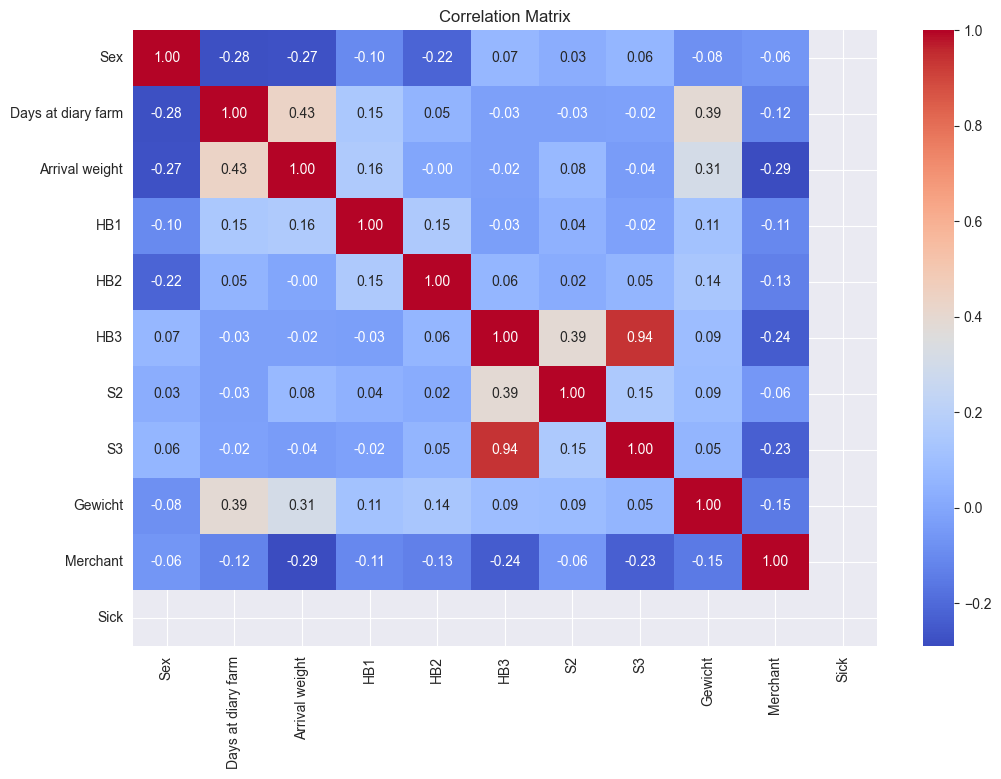

In [182]:
df_final_cleaned_2128334['Sick'] = df_final_cleaned_2128334['Sick'].map({'yes': 1, 'no': 0})


numeric_df = df_final_cleaned_2128334[['Sex', 'Days at diary farm', 'Arrival weight', 'HB1', 'HB2', 'HB3', 'S2', 'S3', 'Gewicht', 'Merchant','Sick']]

correlation = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar = True)
plt.title('Correlation Matrix')
plt.show()

### Pali Slaughterhouse

## Group 2203335

### Slaughterhouse (S)

## Group 2232336

### Slaughterhouse (S)

### Pali Slaughterhouse

## Group 2309337

### Slaughterhouse (S)

## Group 2338338

### Slaughterhouse (S)